In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
import re

In [5]:
from nltk.corpus import stopwords  
from string import punctuation

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [8]:
df = pd.read_excel("zeynep_beyazperde_sentiment.xlsx")

In [9]:
df.head()

,Unnamed: 0,target,text
0,30647,Positive,Tam anlamıyla süper bir film kesinlile seyredin
1,175213,Negative,Hiç bekledğm gibi bir film diildi. Yıkıldm diy...
2,99399,Neutral,biraz iron man gıbı olmus ama olsun will olduk...
3,76491,Neutral,Sadece zombilerin gerçekçiliğini izlemek için...
4,99022,Positive,Bilimkurgu sevmeme rağmen gravity beni baştan ...


In [10]:
df.target.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [11]:
df.groupby("target").nunique("text")

,Unnamed: 0,target,text
target,,,
Negative,640,1,640
Neutral,1289,1,1284
Positive,3071,1,3067


In [12]:
dataPositive = df[(df.target == 'Positive')] 
dataNegative = df[(df.target == 'Negative')]
dataNeutral = df[(df.target == 'Neutral')]

In [13]:

dataPositive.head()

,Unnamed: 0,target,text
0,30647,Positive,Tam anlamıyla süper bir film kesinlile seyredin
4,99022,Positive,Bilimkurgu sevmeme rağmen gravity beni baştan ...
5,63396,Positive,"oyun, yeşil yol, esaretin bedeli, prestij, for..."
6,72192,Positive,ölmeden önce kesinlikle seyretmeniz gereken fi...
9,17478,Positive,Ailenin de içinde bulunduğu eğitim bozukluğuda...


In [14]:
len(dataPositive), len(dataNegative), len(dataNeutral)

(3071, 640, 1289)

In [15]:

data = pd.concat([dataPositive, dataNegative])

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
Unnamed: 0    5000 non-null int64
target        5000 non-null object
text          4992 non-null object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [17]:
len(dataPositive), len(dataNegative),

(3071, 640)

In [18]:
len(data)

3711

In [19]:
data.dropna(inplace = True)  

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3707 entries, 0 to 4994
Data columns (total 3 columns):
Unnamed: 0    3707 non-null int64
target        3707 non-null object
text          3707 non-null object
dtypes: int64(1), object(2)
memory usage: 115.8+ KB


In [21]:
data.describe()

,Unnamed: 0
count,3707.000000
mean,99142.061775
std,51150.996887
min,15198.000000
25%,55149.000000
50%,94509.000000
75%,143015.500000
max,192541.000000


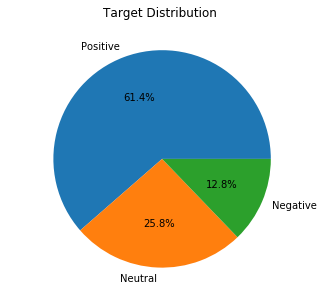

In [22]:
fig = plt.figure(figsize=(5,5))
df['target'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Target Distribution ")
print("")

In [24]:
#target_mapping = {"Positive": 1, "Negative": 2, "Neutral": 3} 
#df['target'] = df['target'].map(target_mapping) 

In [23]:
df.head()

,Unnamed: 0,target,text
0,30647,Positive,Tam anlamıyla süper bir film kesinlile seyredin
1,175213,Negative,Hiç bekledğm gibi bir film diildi. Yıkıldm diy...
2,99399,Neutral,biraz iron man gıbı olmus ama olsun will olduk...
3,76491,Neutral,Sadece zombilerin gerçekçiliğini izlemek için...
4,99022,Positive,Bilimkurgu sevmeme rağmen gravity beni baştan ...


In [25]:
classifier_df = RandomForestClassifier()

In [26]:
vectorizer_Tfid_df = TfidfVectorizer()

In [27]:
data2 = data.drop(['Unnamed: 0'],axis=1)

In [30]:
data2.head()

,target,text
0,Positive,Tam anlamıyla süper bir film kesinlile seyredin
4,Positive,Bilimkurgu sevmeme rağmen gravity beni baştan ...
5,Positive,"oyun, yeşil yol, esaretin bedeli, prestij, for..."
6,Positive,ölmeden önce kesinlikle seyretmeniz gereken fi...
9,Positive,Ailenin de içinde bulunduğu eğitim bozukluğuda...


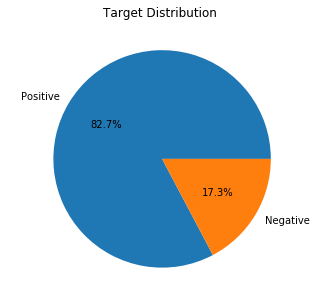

In [31]:
fig = plt.figure(figsize=(5,5))
data2['target'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Target Distribution ")
print("")

In [32]:
classifier = RandomForestClassifier()

In [33]:
vectorizer_Tfid = TfidfVectorizer()

In [34]:
X = data2.text
y = data2.target

In [35]:
X_vectorizer = vectorizer_Tfid.fit_transform(X) 

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_vectorizer, y, test_size = 0.3, random_state= 0)

In [41]:
classifier.fit(X_vectorizer, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_val) 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest) 

84.46


In [52]:
f1_score(y_val, y_pred, average="weighted")

0.7988208021932837

In [53]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

In [54]:
for name, model in models:
    model = classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_val, y_pred)*100))

Logistic Regression -> ACC: %85.62
Naive Bayes -> ACC: %84.55
Decision Tree (CART) -> ACC: %84.46
K-NN -> ACC: %84.64
SVM -> ACC: %86.43
Gradient Boosting Classifier -> ACC: %84.82
AdaBoostClassifier -> ACC: %85.62
BaggingClassifier -> ACC: %85.00
RandomForestClassifier -> ACC: %85.35
MLPClassifier -> ACC: %85.27


In [57]:
classifier.predict(vectorizer_Tfid.transform(["kötü"]))

array(['Positive'], dtype=object)

In [61]:
data2_sample = data2.sample(10)

In [62]:
from veriusapigateway import VeriUsAPIGateway
vu = VeriUsAPIGateway("X6Qn5Q4LMMJAc5GhUaybMSVhlllM3nnt")

ModuleNotFoundError: No module named 'veriusapigateway'

In [63]:
data2_sample["normal"] = data2_sample.text.apply(vu.get_normal)
data2_sample.head()

NameError: name 'vu' is not defined

In [64]:
data2_sample["stemmed"] = data2_sample.normal.apply(vu.get_stem)
data2_sample.head()

AttributeError: 'DataFrame' object has no attribute 'normal'